In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
#testing

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dividir el conjunto de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, random_state=42)

# Asegurarse de que los datos estén en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Ver las formas de los conjuntos resultantes
print("Forma del conjunto de entrenamiento:", x_train.shape)
print("Forma del conjunto de validación:", x_val.shape)
print("Forma del conjunto de prueba:", x_test.shape)


# Definir la cantidad de neuronas en cada capa
input_dim = 784  # Por ejemplo, para imágenes MNIST de 28x28 píxeles (las originales)
alto = 3
ancho = 3   # de las imagenes codificadas

# Definir el codificador
input_img = Input(shape=(input_dim,)) #capa de entrada
n = 9 #cantidad neuronas capa oculta
encoded = Dense(n, activation='relu')(input_img)  # Capa de codificación de n neuronas
decoded = Dense(input_dim, activation='sigmoid')(encoded)  # Capa de decodificación de 784 (IGUAL A LA ENTRADA! ES MUCHO MUY IMPORTANTE)

# Crear los modelos de codificador y decodificador
encoder = Model(input_img, encoded) # solo hasta la salida
autoencoder = Model(input_img, decoded) # todo el modelo

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #todo el modelo, comprende el coder como el decoder


#importante:
#Exacto. Cuando utilizas Model() en Keras para definir un modelo, solo necesitas especificar la capa de entrada y la capa de salida del modelo.
#si has definido capas ocultas o capas intermedias previamente en tu código, estas capas estarán automáticamente incluidas en el modelo completo que se crea con Model() siempre y
#cuando las capas intermedias estén conectadas a través de las capas de entrada y salida que se especifican en Model().


Forma del conjunto de entrenamiento: (51000, 784)
Forma del conjunto de validación: (9000, 784)
Forma del conjunto de prueba: (10000, 784)


Epoch 1/30
200/200 [==============================] - 2s 8ms/step - loss: 0.0929 - val_loss: 0.0639
Epoch 2/30
200/200 [==============================] - 1s 7ms/step - loss: 0.0550 - val_loss: 0.0479
Epoch 3/30
200/200 [==============================] - 1s 6ms/step - loss: 0.0446 - val_loss: 0.0421
Epoch 4/30
200/200 [==============================] - 1s 7ms/step - loss: 0.0405 - val_loss: 0.0391
Epoch 5/30
200/200 [==============================] - 1s 7ms/step - loss: 0.0382 - val_loss: 0.0375
Epoch 6/30
200/200 [==============================] - 1s 7ms/step - loss: 0.0370 - val_loss: 0.0366
Epoch 7/30
200/200 [==============================] - 1s 7ms/step - loss: 0.0363 - val_loss: 0.0359
Epoch 8/30
200/200 [==============================] - 2s 11ms/step - loss: 0.0357 - val_loss: 0.0354
Epoch 9/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0352 - val_loss: 0.0349
Epoch 10/30
200/200 [==============================] - 1s 6ms/step - loss: 0.0348 - val_loss: 0.034

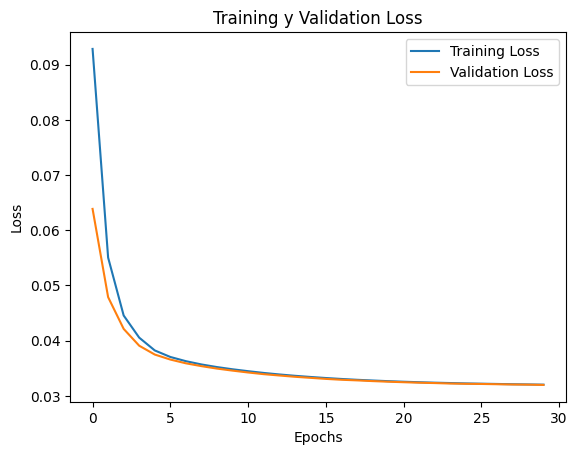

In [ ]:

# Entrenamiento del modelo
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

result = autoencoder.evaluate(x_test, x_test)
print("Test Loss:", result)

# Graficar la pérdida (loss) durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training y Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# NOTA IMPORTANTE, LAS IMAGENES ORIGINALES SON DE 28X28 , EN ESTE CASO LAS CODIFICADAS SON DE X * 1 SIENDO X LA CANTIDAD DE NEURONAS EN LA CAPA OCULTA

313/313 [==============================] - 0s 1ms/step


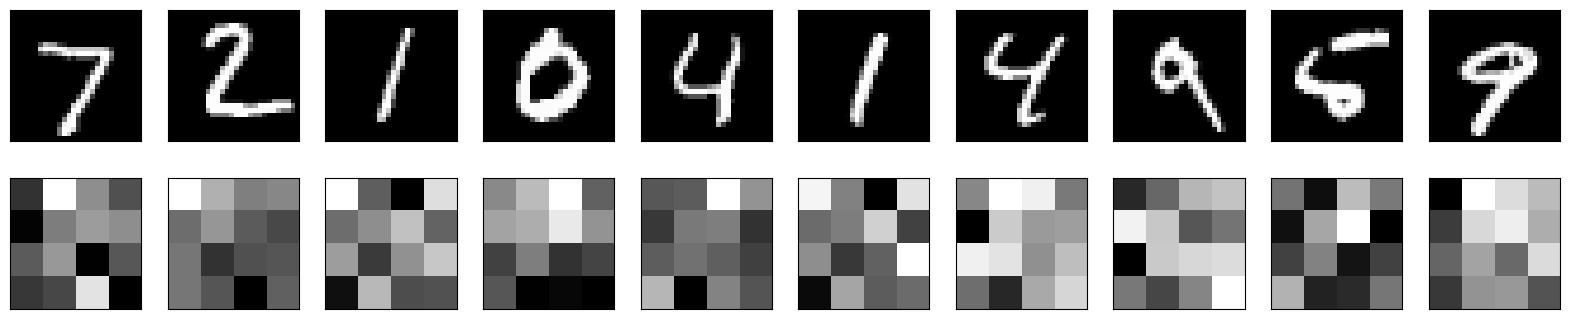

In [ ]:
# imagenes originales, y las codificadas:

# Evaluación del modelo
encoded_imgs = encoder.predict(x_test)

# Visualización de imágenes originales y decodificadas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen decodificada
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(alto, ancho))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


313/313 [==============================] - 1s 2ms/step


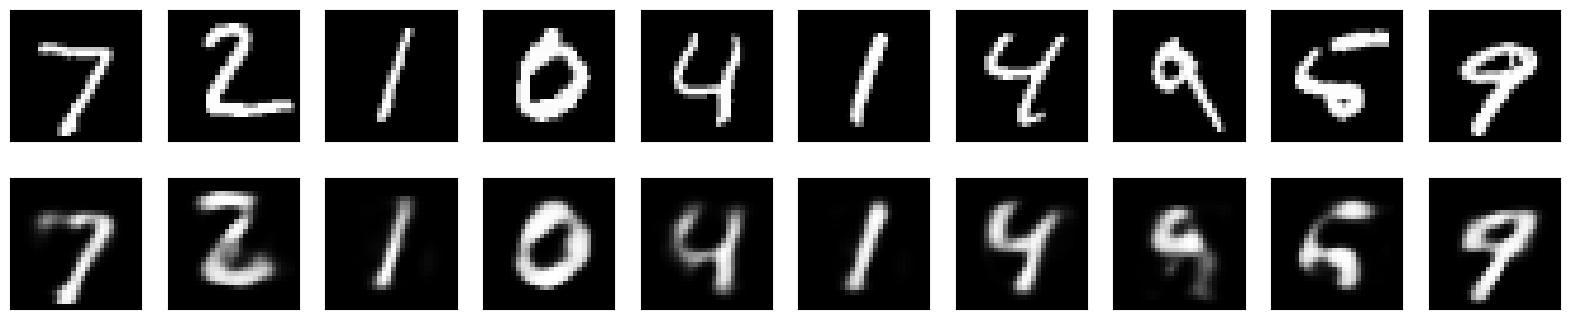

In [ ]:
"""
Finalmente, evaluamos el modelo usando el conjunto de prueba y
visualizamos las imágenes originales y las imágenes reconstruidas después de pasar por el autoencoder. Mostramos un conjunto de 10 imágenes para comparar las originales con las reconstruidas.
"""

# Evaluación del modelo
decoded_imgs = autoencoder.predict(x_test)

# Visualización de imágenes originales y decodificadas
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagen decodificada
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# **Clasificador**

Epoch 1/300
399/399 [==============================] - 7s 17ms/step - loss: 0.4009 - accuracy: 0.8707 - val_loss: 0.1663 - val_accuracy: 0.9524
Epoch 2/300
399/399 [==============================] - 5s 13ms/step - loss: 0.1313 - accuracy: 0.9621 - val_loss: 0.1199 - val_accuracy: 0.9653
Epoch 3/300
399/399 [==============================] - 6s 16ms/step - loss: 0.0852 - accuracy: 0.9748 - val_loss: 0.0962 - val_accuracy: 0.9718
Epoch 4/300
399/399 [==============================] - 6s 15ms/step - loss: 0.0607 - accuracy: 0.9820 - val_loss: 0.0868 - val_accuracy: 0.9750
Epoch 5/300
399/399 [==============================] - 6s 15ms/step - loss: 0.0446 - accuracy: 0.9866 - val_loss: 0.0798 - val_accuracy: 0.9764
Epoch 6/300
399/399 [==============================] - 6s 16ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0784 - val_accuracy: 0.9768
Epoch 7/300
399/399 [==============================] - 5s 13ms/step - loss: 0.0235 - accuracy: 0.9935 - val_loss: 0.0797 - val_accuracy:

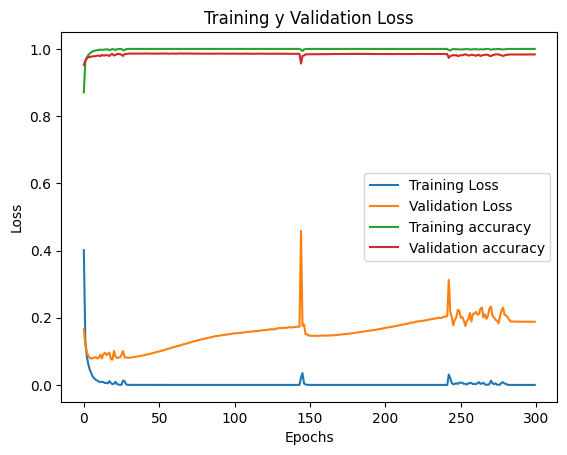

313/313 [==============================] - 1s 3ms/step - loss: 0.2115 - accuracy: 0.9820
Precisión en datos de prueba: 98.20%


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear el modelo secuencial
model = tf.keras.models.Sequential([
    # Capa de entrada con 784 neuronas (28x28 píxeles)
    tf.keras.layers.Dense(784, input_shape=(784,), activation='relu'), # Capa Dense con 784 neuronas

    tf.keras.layers.Dense(10, activation='relu'),

    # Capa de salida con 10 neuronas (una por cada clase) y activación softmax
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#patience = 3 es la paciencia que le va tener en total en cuanto a epochs... osea si el modelo no mejora en validacion durante 3 epochs y solamente pierde... lo stopea

# Entrenar el modelo
#con early stopping
#history = model.fit(x_train, y_train, epochs=30, batch_size=1024, validation_data=(x_val, y_val),callbacks=[early_stopping])

#sin early stopping
history = model.fit(x_train, y_train, epochs=300, batch_size=128, validation_data=(x_val, y_val))

# Graficar la pérdida (loss) durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training y Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluar el modelo en datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en datos de prueba: {test_acc * 100:.2f}%')

In [ ]:
"""
#early stopping
from tensorflow.keras.callbacks import EarlyStopping

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
#patience = 3 es la paciencia que le va tener en total en cuanto a epochs... osea si el modelo no mejora en validacion durante 3 epochs y solamente pierde... lo stopea
# Entrenar el modelo con Early Stopping
history = model.fit(x_train, x_train,
                          epochs=40,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_val, x_val),
                          callbacks=[early_stopping])
"""

In [ ]:
"""
#validando que la configuracion de 7 epochs con 1024 bz y 10 nauronas es suficiente
for epochs in range(7,20,2):
  history = model.fit(x_train, y_train, epochs=epochs, batch_size=1024, validation_data=(x_val, y_val), verbose=0)

  # Evaluar el modelo en datos de prueba
  test_loss, test_acc = model.evaluate(x_test, y_test)
  print(f'Con {epochs} epochs: {test_acc * 100:.2f}%')


deshabilitado para la ejecucio normal de la notebook, pero queda como evidencia de que algunos tests que se ven en el informe
"""

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9763
Con 7 epochs: 97.63%
313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9772
Con 9 epochs: 97.72%
313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9785
Con 11 epochs: 97.85%
313/313 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.9792
Con 13 epochs: 97.92%
313/313 [==============================] - 1s 2ms/step - loss: 0.0967 - accuracy: 0.9791
Con 15 epochs: 97.91%


KeyboardInterrupt: ignored

313/313 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9786
Precisión en datos de prueba: 97.86%
313/313 [==============================] - 1s 2ms/step


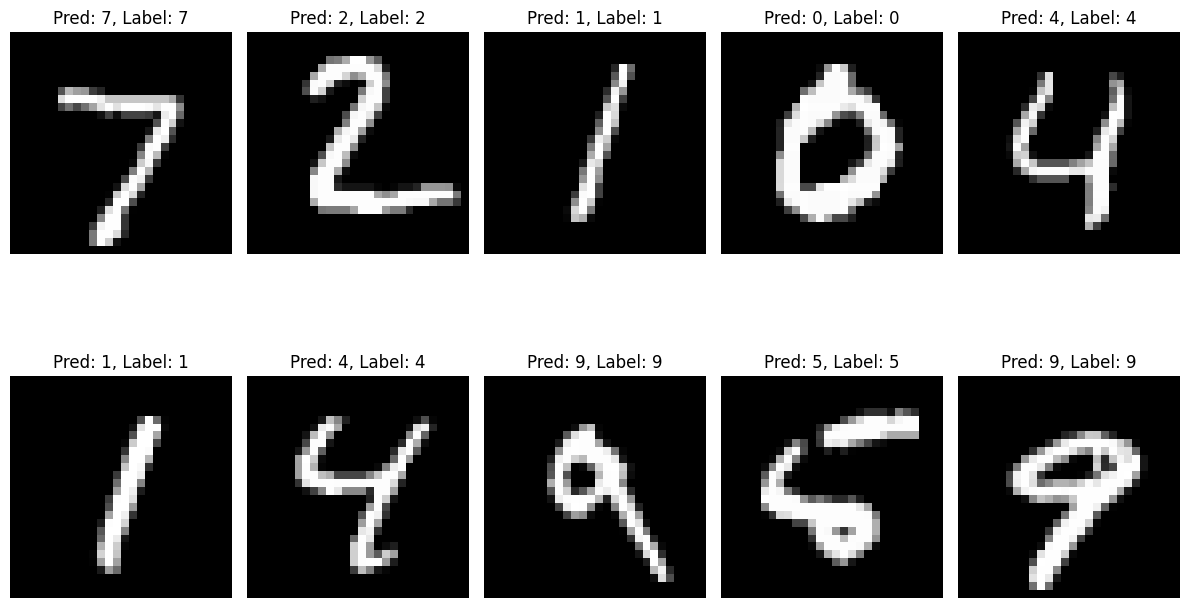

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en datos de prueba: {test_acc * 100:.2f}%')

# Mostrar imágenes y predicciones para cada muestra en los datos de prueba
predictions = model.predict(x_test)
num_samples_to_display = 10  # Cambia este valor para mostrar más o menos muestras
plt.figure(figsize=(12, 8))
for i in range(num_samples_to_display):
    plt.subplot(2, num_samples_to_display // 2, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}, Label: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.9263
Precisión en datos de prueba: 92.63%


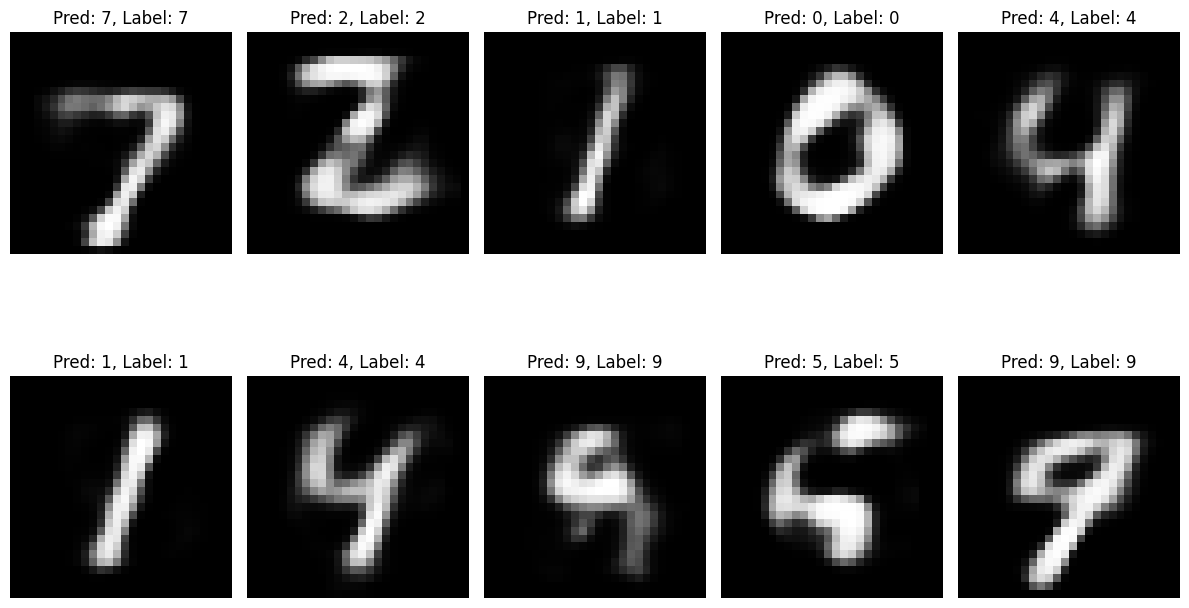

In [ ]:
# Ejecutar predicciones con la salida del autoencoder
decoded_imgs = autoencoder.predict(x_test)
decoded_predictions = model.predict(decoded_imgs)
test_loss, test_acc = model.evaluate(decoded_imgs, y_test)
print(f'Precisión en datos de prueba: {test_acc * 100:.2f}%')

# Mostrar imágenes y predicciones para cada muestra con la salida del autoencoder
num_samples_to_display = 10  # Cambia este valor para mostrar más o menos muestras
plt.figure(figsize=(12, 8))
for i in range(num_samples_to_display):
    plt.subplot(2, num_samples_to_display // 2, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {np.argmax(decoded_predictions[i])}, Label: {y_test[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()